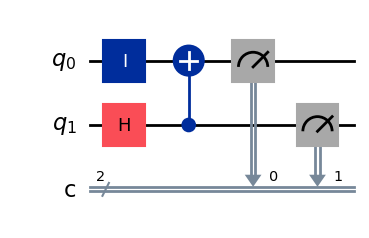

In [150]:
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler

from qiskit.circuit import Parameter


import numpy as np

#service = QiskitRuntimeService()

qc = QuantumCircuit(2, 2)
#qc = QuantumCircuit(2)

qc.id(0)
qc.h(1)
qc.cx(1, 0)

qc.measure(0, 0)
qc.measure(1, 1)
#qc.measure_all()

qc.draw(output='mpl')

In [15]:
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = Sampler()
    result = sampler.run([isa_qc]).result()

QiskitBackendNotFoundError: 'No backend matches the criteria.'

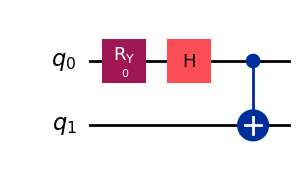

In [63]:
qc = QuantumCircuit(2)
qc.ry(0, 0)
qc.h(0)
qc.cx(0,1)
qc.draw("mpl", style="iqp")

In [133]:
observable = SparsePauliOp(["ZZ"], coeffs=[1])
parameter_values = [[0], [np.pi/6], [np.pi/2]]

aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)

isa_observable = observable.apply_layout(isa_qc.layout)



In [134]:
from qiskit.primitives import StatevectorEstimator
estimator = StatevectorEstimator()

In [135]:

#job = estimator.run([(isa_qc, isa_observable, parameter_values)])
job = estimator.run([(isa_qc, isa_observable)])
#job = estimator.run([isa_qc])
result = job.result()
print(f" > Result class: {type(result)}")

 > Result class: <class 'qiskit.primitives.containers.primitive_result.PrimitiveResult'>


In [136]:
print(f" > Expectation value: {result[0].data.evs}")
print(f" > Metadata: {result[0].metadata}")

 > Expectation value: 0.9999999999999998
 > Metadata: {'precision': 0.0}


In [143]:
print(f" > Expectation value: {result[0].data.stds}")

 > Expectation value: 0.0


In [120]:
result.get

AttributeError: 'PrimitiveResult' object has no attribute 'get'

In [146]:
from qiskit import execute, QuantumCircuit
from qiskit_aer import Aer
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel

# Create a quantum circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# Execute the circuit on a simulator backend
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()

# Access the expectation values of the first experiment
evs = result.data(0).get('evs')

print(evs)


ImportError: cannot import name 'execute' from 'qiskit' (/home/santana/MyStuff/QuantumJourney/quantum_venv/lib/python3.11/site-packages/qiskit/__init__.py)

In [145]:
counts = result.get_counts(qc)

AttributeError: 'PrimitiveResult' object has no attribute 'get_counts'

In [153]:


# Import section
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile

# For execution
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
for i in range(100):
    sim_result = simulator.run(compiled_circuit).result()
    counts = sim_result.get_counts()
    print(counts)

{'00': 495, '11': 529}
{'11': 520, '00': 504}
{'00': 513, '11': 511}
{'11': 487, '00': 537}
{'00': 536, '11': 488}
{'00': 511, '11': 513}
{'11': 511, '00': 513}
{'11': 486, '00': 538}
{'00': 531, '11': 493}
{'11': 514, '00': 510}
{'11': 566, '00': 458}
{'00': 528, '11': 496}
{'00': 529, '11': 495}
{'00': 506, '11': 518}
{'11': 536, '00': 488}
{'11': 518, '00': 506}
{'00': 514, '11': 510}
{'00': 512, '11': 512}
{'11': 518, '00': 506}
{'00': 526, '11': 498}
{'00': 521, '11': 503}
{'00': 485, '11': 539}
{'11': 522, '00': 502}
{'11': 501, '00': 523}
{'11': 511, '00': 513}
{'11': 510, '00': 514}
{'11': 546, '00': 478}
{'00': 525, '11': 499}
{'11': 511, '00': 513}
{'11': 514, '00': 510}
{'11': 503, '00': 521}
{'11': 509, '00': 515}
{'00': 497, '11': 527}
{'00': 530, '11': 494}
{'11': 517, '00': 507}
{'00': 535, '11': 489}
{'00': 493, '11': 531}
{'11': 499, '00': 525}
{'00': 506, '11': 518}
{'00': 512, '11': 512}
{'11': 525, '00': 499}
{'11': 525, '00': 499}
{'00': 479, '11': 545}
{'00': 510,

{'11': 501, '00': 523}
